In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures , LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

 Variables in order:
 
 CRIM -    per capita crime rate by town

 ZN -       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS -   proportion of non-retail business acres per town

 CHAS -    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX -     nitric oxides concentration (parts per 10 million) 

 RM -      average number of rooms per dwelling

 AGE -     proportion of owner-occupied units built prior to 1940

 DIS -     weighted distances to five Boston employment centres

 RAD -    index of accessibility to radial highways

 TAX -     full-value property-tax rate per $10,000

 PTRATIO -  pupil-teacher ratio by town

 B -       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT -   % lower status of the population

 MEDV -    Median value of owner-occupied homes in $1000's

### 1. Load and explore the dataset.

In [264]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15636\2467485421.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,header=None)


In [265]:
df = pd.DataFrame(data)

In [266]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [263]:
a = df.to_csv('Boston_House_Price_Dataset.csv')

In [151]:
target_values = pd.DataFrame(target)
target_values

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 2. Perform data preprocessing (handling missing values, encoding categorical variables, etc.).

In [152]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [153]:
target_values.isnull().sum()

0    0
dtype: int64

In [267]:
df.columns = column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [268]:
target_values.columns = column_name = ['MEDV']

In [269]:
df['Target']=target_values

In [271]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [272]:
a = df.to_csv("Boston_House_Dataset.csv")

Text(0, 0.5, 'MEDV')

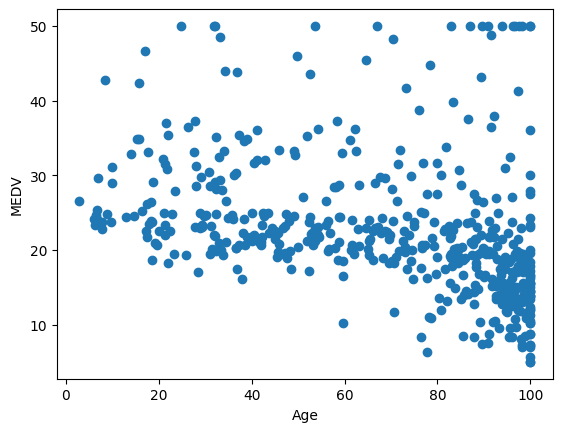

In [158]:
plt.scatter(x=df['AGE'],y=df['Target'])
plt.xlabel('Age')
plt.ylabel('MEDV')

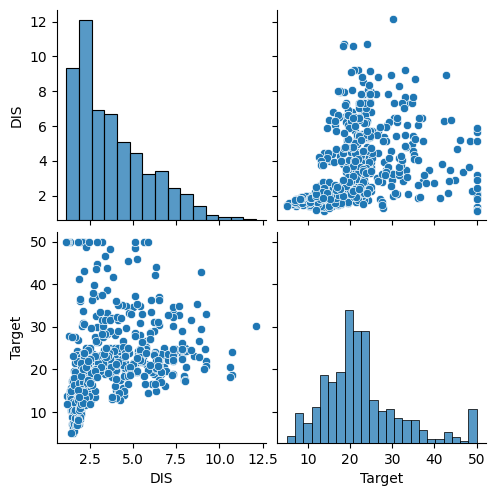

In [159]:
##Price of House because of the distance from the 5 employment sectors
sns.pairplot(df,vars=['DIS','Target'])

In [160]:
labelencoder = LabelEncoder()

In [161]:
df['CHAS'] = labelencoder.fit_transform(df['CHAS'].astype(str))

### 3. Split the data into training and testing sets.

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [164]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [165]:
regression = LinearRegression()

In [166]:
regression.fit(X_train,y_train)

LinearRegression()

In [167]:
y_pred = regression.predict(X_test)

In [168]:
#Accuracy Measures
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rsme = np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RSME:",rsme)

MSE: 22.09869482709827
MAE: 3.0609395954370795
RSME: 4.700924890603791


In [169]:
print(regression.intercept_)

[29.83642016]


In [170]:
#Performance metrices
from sklearn.metrics import r2_score  

In [171]:
R2_score = r2_score(y_test,regression.predict(X_test))
R2_score

0.684426728352709

In [172]:
adjusted_R2_Score = 1-(1-R2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_R2_Score

0.6481218386941712

<Axes: xlabel='Target'>

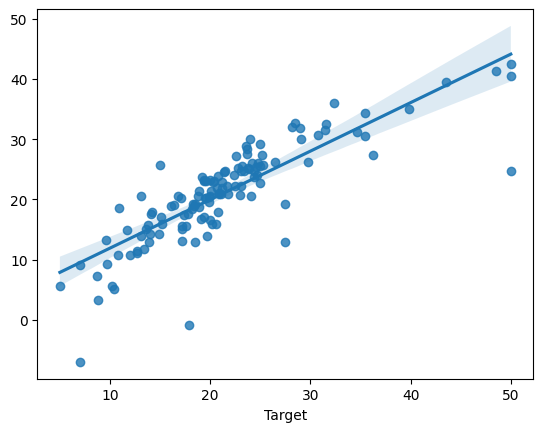

In [173]:
sns.regplot(x=y_test,y=y_pred)


### Decision Tree

In [174]:
target_column = df['CHAS']

In [175]:
x = df.drop('CHAS',axis=1)
Y = df['CHAS']

In [176]:
x_train , x_test  , Y_train , Y_test = train_test_split(x,Y,test_size=0.25,random_state=42)

In [178]:
treeclassifier = DecisionTreeClassifier()

In [179]:
treeclassifier.fit(x_train,Y_train)

DecisionTreeClassifier()

In [180]:
y_predict = treeclassifier.predict(x_test)

[Text(0.6627906976744186, 0.9615384615384616, 'x[12] <= 45.7\ngini = 0.141\nsamples = 379\nvalue = [350, 29]'),
 Text(0.4186046511627907, 0.8846153846153846, 'x[3] <= 0.755\ngini = 0.114\nsamples = 362\nvalue = [340, 22]'),
 Text(0.5406976744186046, 0.9230769230769231, 'True  '),
 Text(0.3023255813953488, 0.8076923076923077, 'x[4] <= 8.558\ngini = 0.079\nsamples = 340\nvalue = [326, 14]'),
 Text(0.2558139534883721, 0.7307692307692307, 'x[9] <= 18.65\ngini = 0.074\nsamples = 339\nvalue = [326, 13]'),
 Text(0.20930232558139536, 0.6538461538461539, 'x[2] <= 6.145\ngini = 0.146\nsamples = 164\nvalue = [151, 13]'),
 Text(0.16279069767441862, 0.5769230769230769, 'gini = 0.0\nsamples = 86\nvalue = [86, 0]'),
 Text(0.2558139534883721, 0.5769230769230769, 'x[2] <= 6.66\ngini = 0.278\nsamples = 78\nvalue = [65, 13]'),
 Text(0.09302325581395349, 0.5, 'x[10] <= 387.915\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.046511627906976744, 0.4230769230769231, 'gini = 0.0\nsamples = 6\nvalue = [6

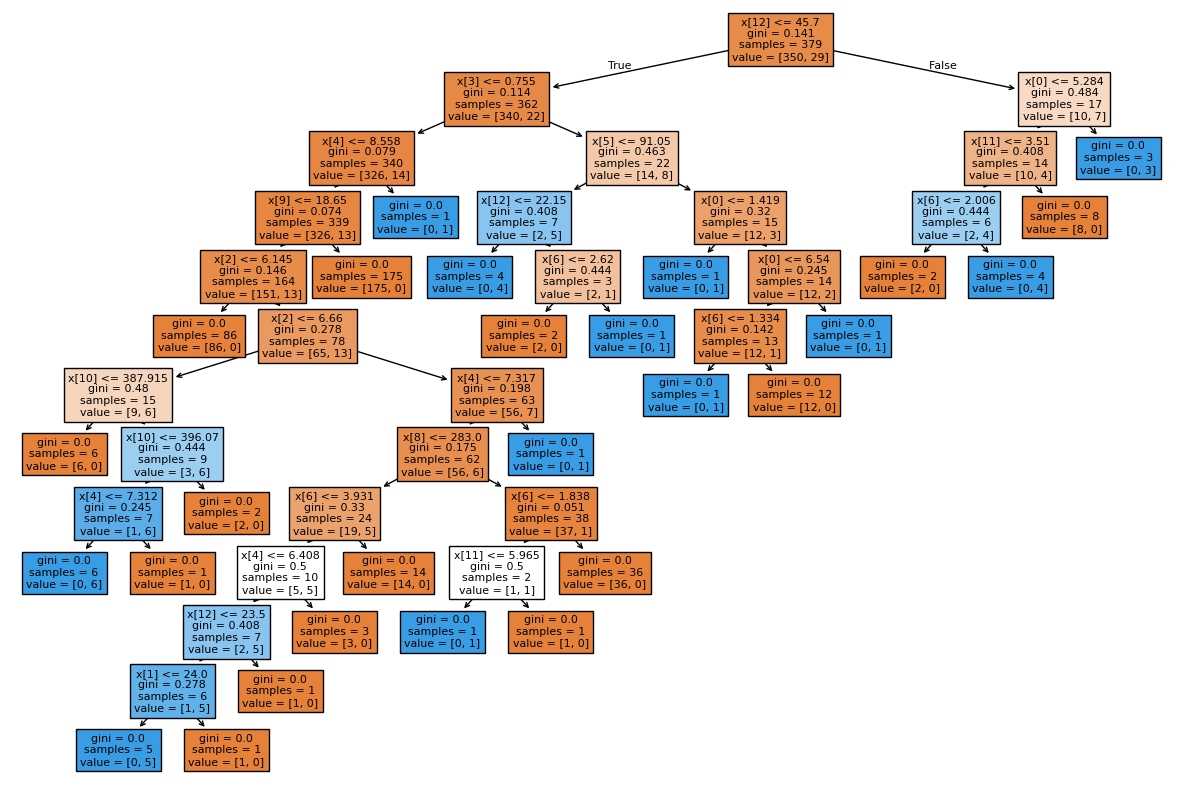

In [183]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [184]:
tree_classifier = DecisionTreeClassifier(max_depth=2)

In [185]:
tree_classifier.fit(x_train, Y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[12] <= 45.7\ngini = 0.141\nsamples = 379\nvalue = [350, 29]'),
 Text(0.25, 0.5, 'x[3] <= 0.755\ngini = 0.114\nsamples = 362\nvalue = [340, 22]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.079\nsamples = 340\nvalue = [326, 14]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.463\nsamples = 22\nvalue = [14, 8]'),
 Text(0.75, 0.5, 'x[0] <= 5.284\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

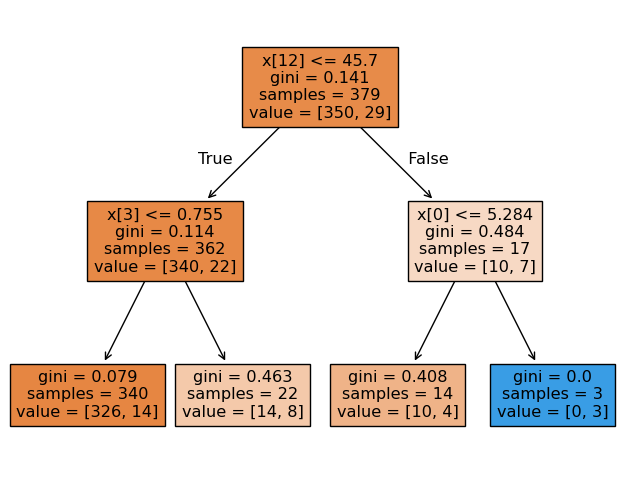

In [186]:
plt.figure(figsize=(8,6))
tree.plot_tree(tree_classifier,filled=True)

In [187]:
pred_y = tree_classifier.predict(x_test)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [188]:
from sklearn.metrics import confusion_matrix,classification_report

In [189]:
cm = confusion_matrix(Y_test,pred_y)
print(cm)

[[120   1]
 [  6   0]]


In [190]:
print(classification_report(Y_test,pred_y))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       121
           1       0.00      0.00      0.00         6

    accuracy                           0.94       127
   macro avg       0.48      0.50      0.49       127
weighted avg       0.91      0.94      0.93       127



In [191]:
mse = mean_squared_error(Y_test,pred_y)
mae = mean_absolute_error(Y_test,pred_y)
rsme = np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RSME:",rsme)

MSE: 0.05511811023622047
MAE: 0.05511811023622047
RSME: 0.23477246481693817


## Random Forest Classification

### Feature engineering

In [192]:
num_features = [features for features in df.columns if df[features].dtype!='O' ]
print('Num of numerical features:',len(num_features))
cat_features = [features for features in df.columns if df[features].dtype=='O' ]
print('Num of categorical features:',len(cat_features))
dis_features = [features for features in df.columns if len(df[features].unique())<=25 ]
print('Num of discrete features:',len(dis_features))
continuous_features = [features for features in df.columns if features not in dis_features ]
print('Num of continuous features:',len(dis_features))

Num of numerical features: 14
Num of categorical features: 0
Num of discrete features: 2
Num of continuous features: 2


In [194]:
A = df.drop('Target',axis=1)
b = df['Target']

In [199]:
A_train , A_test , b_train , b_test = train_test_split(A,b,test_size=0.25,random_state=42)

In [209]:
le = LabelEncoder()
df['Target']=le.fit_transform(df['Target'])

In [221]:
len(df['INDUS'].unique()),len(df['AGE'].unique()),len(df['TAX'].unique()),len(df['CRIM'].unique())

(76, 356, 66, 504)

In [226]:
from sklearn.ensemble import RandomForestRegressor


In [227]:
Randomforest = RandomForestRegressor()

In [229]:
Randomforest.fit(A_train,b_train)

RandomForestRegressor()

In [230]:
pred__y = Randomforest.predict(A_test)

In [239]:
mse = mean_squared_error(b_test,pred__y)
mae = mean_absolute_error(b_test,pred__y)
rsme = np.sqrt(mse)
print("MSE for Random Forest classifier:",mse)
print("MAE for Random Forest Classfier:",mae)
print("RSME for Random Forest Classifier:",rsme)

MSE for Random Forest classifier: 10.103794173228351
MAE for Random Forest Classfier: 2.0967716535433074
RSME for Random Forest Classifier: 3.1786465945789493


### Simplified form for comparing the performance of the models

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [251]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mse,mae,rmse,r2_square

### Evaluate the model's performance using appropriate metrics and compare the same for above used three models.

In [253]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(A_train, b_train)

    y_train_pred = model.predict(A_train)
    y_test_pred = model.predict(A_test)

    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(b_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(b_test, y_test_pred)

    print(model_name)

    print('Model performance for training set:')
    print("- Mean Square error : {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- Mean absolute Error : {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))

    print('------------------------------------------------------------')

    print('Model performance for testing set:')
    print("- Mean Square error : {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- Mean absolute Error : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for training set:
- Mean Square error : 22.3401
- Root Mean Squared Error : 4.7265
- Mean absolute Error : 3.3663
- R2 Score : 0.7481
------------------------------------------------------------
Model performance for testing set:
- Mean Square error : 22.0987
- Root Mean Squared Error : 4.7009
- Mean absolute Error : 3.0609
- R2 Score : 0.6844


Decision Tree
Model performance for training set:
- Mean Square error : 0.0000
- Root Mean Squared Error : 0.0000
- Mean absolute Error : 0.0000
- R2 Score : 1.0000
------------------------------------------------------------
Model performance for testing set:
- Mean Square error : 12.2086
- Root Mean Squared Error : 3.4941
- Mean absolute Error : 2.7394
- R2 Score : 0.8257


Random Forest Regressor
Model performance for training set:
- Mean Square error : 1.7758
- Root Mean Squared Error : 1.3326
- Mean absolute Error : 0.8813
- R2 Score : 0.9800
------------------------------------------------------------
M

### 6. Perform feature selection to identify the most important features for predicting house prices.

In [254]:

importances = Randomforest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]:.4f}) - {X.columns[indices[f]]}")


Feature ranking:
1. Feature 5 (0.4500) - RM
2. Feature 12 (0.3697) - LSTAT
3. Feature 7 (0.0629) - DIS
4. Feature 0 (0.0322) - CRIM
5. Feature 10 (0.0172) - PTRATIO
6. Feature 6 (0.0154) - AGE
7. Feature 11 (0.0131) - B
8. Feature 4 (0.0127) - NOX
9. Feature 9 (0.0120) - TAX
10. Feature 2 (0.0072) - INDUS
11. Feature 8 (0.0048) - RAD
12. Feature 1 (0.0018) - ZN
13. Feature 3 (0.0010) - CHAS


### 7. Visualize the predictions vs. actual prices using scatter plots or other suitable plots.

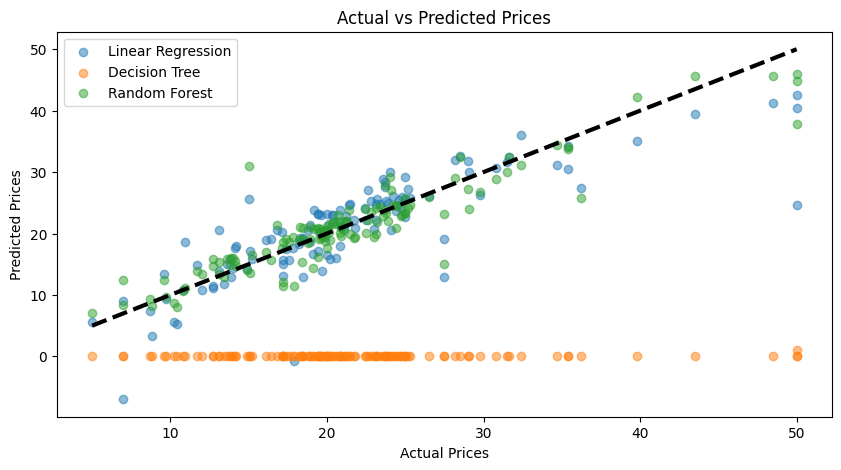

In [255]:
plt.figure(figsize=(10, 5))
plt.scatter(b_test, y_pred, label='Linear Regression', alpha=0.5)
plt.scatter(b_test, pred_y, label='Decision Tree', alpha=0.5)
plt.scatter(b_test, pred__y, label='Random Forest', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()